###### we will build a Linear model that will predict the extent of progression of diabetes in a patient given some of the feature of the patient

###### import required packages

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# dataset
from sklearn.datasets import load_diabetes

# model 
from sklearn.linear_model import LinearRegression

# preprocessing
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
diabetes_dataset = load_diabetes()

In [3]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [4]:
print(diabetes_dataset.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [11]:
diabetes_data = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
diabetes_data['target'] = diabetes_dataset.target

In [12]:
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


###### check for null values and understand some basic statistics of the data

In [13]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [14]:
# checking for any null value
diabetes_data.isnull().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

In [15]:
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


###### visualizing the data

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

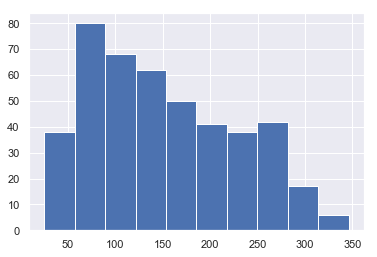

In [16]:
plt.hist(diabetes_data['target'])

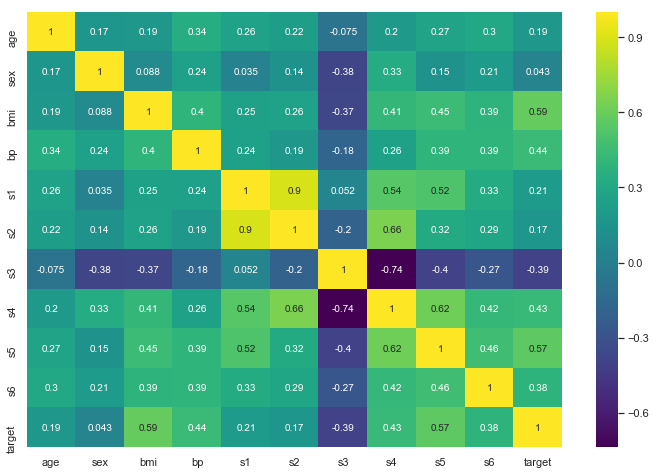

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(diabetes_data.corr(), annot=True, ax=ax, cmap='viridis')

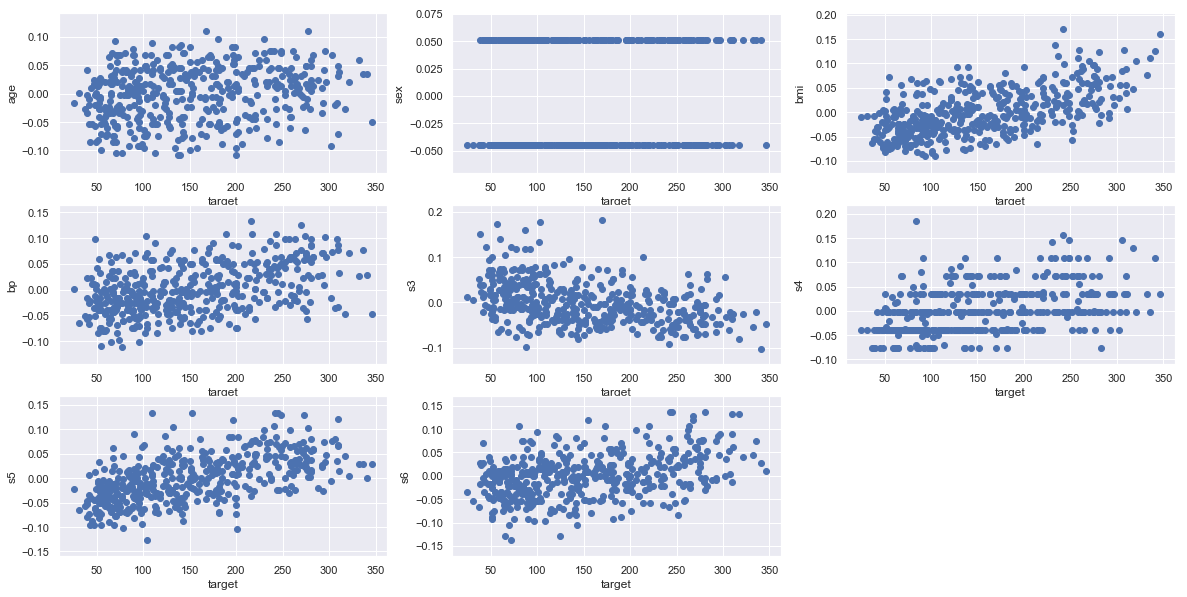

In [18]:
columns = ['age', 'sex', 'bmi', 'bp', 's3', 's4', 's5', 's6']

plt.figure(figsize=(20,10))
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(diabetes_data['target'], diabetes_data[col])
    plt.xlabel('target')
    plt.ylabel(col)

In [19]:
diabetes_data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

###### preprocessing

In [20]:

X = diabetes_data[['bmi', 'bp', 's3', 's4', 's5']]
y = diabetes_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [21]:
# lets create our model and fit it with our training examples
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# lets predict the output for our test data
y_predict = model.predict(X_test)

In [23]:
y_test_fit = model.predict(X_train)

In [26]:
mean_absolute_error(y_test_fit, y_train)

42.55151026771674

In [27]:
# lets evaulate the metrics of our model
mean_absolute_error(y_predict, y_test)

53.23390016469019

In [106]:
mean_squared_error(y_predict, y_test)

4186.136714267394

In [107]:
r2_score(y_predict, y_test)

-0.4645316100330774

In [108]:
model.coef_

array([ 586.31356165,  248.57330726, -353.89087363, -256.52156528,
        580.18668807])

In [109]:
model.intercept_

150.94158223363672

Text(0,0.5,'actual value')

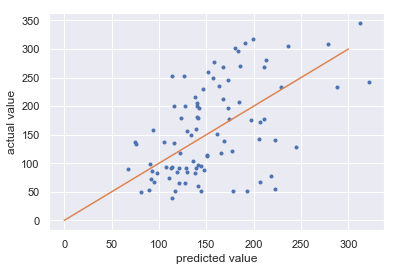

In [101]:
# let us plot the predicted and actual data
plt.plot(y_predict, y_test, '.')


# a straigt line that where all perfect predict would lie
x = np.linspace(0, 300, 100)
y = x
plt.plot(x, y)
plt.xlabel('predicted value')
plt.ylabel('actual value')